In [16]:
import pandas as pd
import numpy as np

In [17]:
data = pd.read_csv('f_values_r_nsga_ii.csv')
data

,4.489109206338354197e-01,1.152543602374665355e+00
0,0.575619,1.101881
1,1.136860,0.732040
2,0.207543,1.099134
3,0.986390,0.548399
4,0.002896,1.625912
...,...,...
94,1.228242,0.035492
95,1.256985,0.440264
96,1.087160,0.616679
97,0.140289,1.411173


In [18]:
column_data = [float(i) for i in data.columns]
remaining_data = data.to_numpy()
remaining_data

array([[0.57561894, 1.10188061],
       [1.13686006, 0.7320396 ],
       [0.20754267, 1.09913361],
       [0.98639005, 0.54839901],
       [0.00289581, 1.62591168],
       [1.31547433, 0.07020579],
       [1.43167617, 0.19593853],
       [1.20905875, 0.87898769],
       [1.25725762, 0.95327387],
       [0.83350059, 1.16313132],
       [1.16038216, 0.37368869],
       [1.24721458, 0.67977233],
       [0.75761625, 0.76334956],
       [1.21666531, 0.23339526],
       [1.22666029, 1.01790899],
       [1.28769931, 0.2907208 ],
       [1.48539212, 0.17486129],
       [0.56379927, 1.14001148],
       [0.22938365, 1.59418535],
       [1.06690889, 0.52023173],
       [1.10447179, 0.98283642],
       [1.51812186, 0.65933951],
       [0.98502054, 1.4060689 ],
       [0.04205615, 1.29640944],
       [0.01557053, 1.11842231],
       [0.298146  , 1.26482836],
       [1.54331765, 0.72672552],
       [0.06872614, 1.34119605],
       [1.24847859, 0.08210062],
       [1.0844678 , 0.86155116],
       [1.

In [19]:
final_data = []
final_data.append(column_data)
for i in remaining_data:
    final_data.append(list(i))
final_data

[[0.4489109206338354, 1.1525436023746654],
 [0.5756189390497641, 1.1018806075616636],
 [1.136860057627934, 0.7320395964246349],
 [0.20754267486120867, 1.0991336123543425],
 [0.9863900497479609, 0.5483990103369387],
 [0.002895810482683848, 1.6259116847982764],
 [1.3154743280695271, 0.07020579295580961],
 [1.4316761747563782, 0.1959385253140752],
 [1.2090587521830864, 0.878987686453633],
 [1.2572576178655577, 0.9532738744672568],
 [0.833500585458498, 1.1631313212142576],
 [1.1603821577541475, 0.3736886855727749],
 [1.2472145792251663, 0.6797723297160101],
 [0.7576162522954822, 0.7633495559030219],
 [1.216665309229671, 0.23339525974584813],
 [1.2266602879717647, 1.0179089921906173],
 [1.2876993144427946, 0.2907207975754424],
 [1.4853921167755515, 0.17486128702023465],
 [0.5637992660415477, 1.140011475323128],
 [0.22938364927839383, 1.5941853455484831],
 [1.0669088900986137, 0.5202317254638622],
 [1.104471790499836, 0.9828364170173997],
 [1.5181218568227623, 0.6593395104027663],
 [0.985020

In [20]:
def dominates_Flag(A,B):
    flag = False
    count = 0 
    for i in range(0,len(A)):
        if(A[i]<B[i]):
            flag = True
            count = count +1
        elif(A[i]==B[i]):
            flag = True
        else:
            flag = False
            break
    if(flag == True and count >= 1):
        return True
    else:
        return False



In [21]:
def non_dominated_fronts(final_data,num_solns):
    ranks = []
    data_copy = final_data
    while(len(data_copy)>=num_solns):
        internal_ranks = []
        for i in data_copy:
            Flag =False
            for j in data_copy:
                if(i!=j and i not in internal_ranks and dominates_Flag(j,i)==False):
                    Flag = True
                elif(i!=j and i not in internal_ranks and dominates_Flag(j,i)==True):
                    Flag=False
                    break
            if(Flag==True):
                internal_ranks.append(i)
        ranks.append(internal_ranks)
        #print(internal_ranks)
        for i in internal_ranks:
            data_copy.remove(i)
    return ranks
            



In [22]:
ranks = non_dominated_fronts(final_data,40)

In [23]:
len(ranks)

4

In [26]:
for i in range(len(ranks)):
    print('number of elements in front {0} is {1}'.format(i,len(ranks[i])))
print('Number of elements to remove from last front is {0}'.format((15+18+13+19)-50))

number of elements in front 0 is 15
number of elements in front 1 is 18
number of elements in front 2 is 13
number of elements in front 3 is 19
Number of elements to remove from last front is 15


Text(0.5, 0, 'Objective 1')

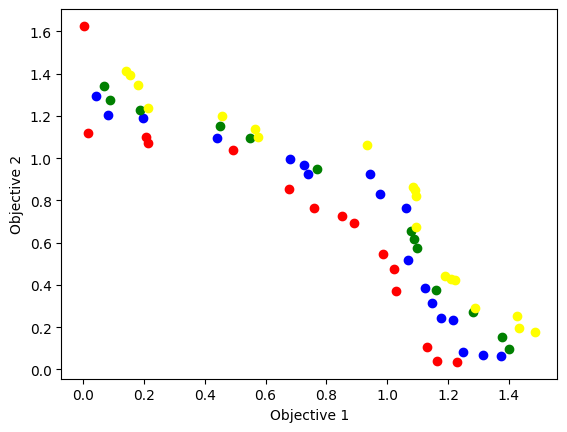

In [29]:
import matplotlib.pyplot as plt
# plotting all the fronts
front_1_x = [i[0] for i in ranks[0]]
front_1_y = [i[1] for i in ranks[0]]
front_2_x = [i[0] for i in ranks[1]]
front_2_y = [i[1] for i in ranks[1]]
front_3_x = [i[0] for i in ranks[2]]
front_3_y = [i[1] for i in ranks[2]]
front_4_x = [i[0] for i in ranks[3]]
front_4_y = [i[1] for i in ranks[3]]
plt.scatter(front_1_x,front_1_y,color='red')
plt.scatter(front_2_x,front_2_y,color='blue')
plt.scatter(front_3_x,front_3_y,color='green')
plt.scatter(front_4_x,front_4_y,color='yellow')
plt.ylabel('Objective 2')
plt.xlabel('Objective 1')

In [31]:
def crowding_distance_calculation(front,data):
    objective_1  = [i[0] for i in front]
    objective_2  = [i[1] for i in front]
    objective_1_full  = [i[0] for i in data]
    objective_2_full  = [i[1] for i in data]
    objective_1.sort()
    objective_2.sort()
    distance_1 = [0 for i in range(len(objective_1))]
    distance_2 = [0 for i in range(len(objective_2))]
    distance_1[0] = np.inf
    distance_1[len(distance_1)-1] = np.inf
    distance_2[0] = np.inf
    distance_2[len(distance_2)-1] = np.inf
    objective_1_max = max(objective_1_full)
    objective_2_max = max(objective_2_full)
    objective_1_min = min(objective_1_full)
    objective_2_min = min(objective_2_full)
    for i in range(1,len(objective_1)-1):
        distance_1[i]  =distance_1[i] + (objective_1[i+1] - objective_1[i-1])/(objective_1_max-objective_1_min)
        distance_2[i]  =distance_2[i] + (objective_2[i+1] - objective_2[i-1])/(objective_2_max-objective_2_min)
    return (distance_1,distance_2)




In [33]:
final_data = []
final_data.append(column_data)
for i in remaining_data:
    final_data.append(list(i))
final_data

[[0.4489109206338354, 1.1525436023746654],
 [0.5756189390497641, 1.1018806075616636],
 [1.136860057627934, 0.7320395964246349],
 [0.20754267486120867, 1.0991336123543425],
 [0.9863900497479609, 0.5483990103369387],
 [0.002895810482683848, 1.6259116847982764],
 [1.3154743280695271, 0.07020579295580961],
 [1.4316761747563782, 0.1959385253140752],
 [1.2090587521830864, 0.878987686453633],
 [1.2572576178655577, 0.9532738744672568],
 [0.833500585458498, 1.1631313212142576],
 [1.1603821577541475, 0.3736886855727749],
 [1.2472145792251663, 0.6797723297160101],
 [0.7576162522954822, 0.7633495559030219],
 [1.216665309229671, 0.23339525974584813],
 [1.2266602879717647, 1.0179089921906173],
 [1.2876993144427946, 0.2907207975754424],
 [1.4853921167755515, 0.17486128702023465],
 [0.5637992660415477, 1.140011475323128],
 [0.22938364927839383, 1.5941853455484831],
 [1.0669088900986137, 0.5202317254638622],
 [1.104471790499836, 0.9828364170173997],
 [1.5181218568227623, 0.6593395104027663],
 [0.985020

In [35]:
distance_1,distance_2 = crowding_distance_calculation(ranks[3],final_data)

In [36]:
distance_1

[inf,
 0.024866484277708354,
 0.035780469599022056,
 0.17535489175349156,
 0.22239963306942787,
 0.07533721351736086,
 0.23339710120568963,
 0.3220953054922773,
 0.101467677414208,
 0.007112707817013393,
 0.002145875306124287,
 0.0587653712978808,
 0.07198402687219348,
 0.021685449672401005,
 0.049225484718622446,
 0.12862673548742978,
 0.09113564905706018,
 0.037590087377893384,
 inf]

In [37]:
distance_2

[inf,
 0.04901149942573588,
 0.05959576630524976,
 0.10610365333663635,
 0.08749459831230946,
 0.014306105662797513,
 0.15374213858861716,
 0.23608206787649558,
 0.1100934639463514,
 0.026263162896239364,
 0.1337239287299202,
 0.15111072475085405,
 0.048950041758841226,
 0.06283605443445762,
 0.060960663355912305,
 0.09126608341096996,
 0.09744149196485447,
 0.04037028423758555,
 inf]

In [38]:
total_distance = np.add(distance_1,distance_2)
total_distance

array([       inf, 0.07387798, 0.09537624, 0.28145855, 0.30989423,
       0.08964332, 0.38713924, 0.55817737, 0.21156114, 0.03337587,
       0.1358698 , 0.2098761 , 0.12093407, 0.0845215 , 0.11018615,
       0.21989282, 0.18857714, 0.07796037,        inf])

In [39]:
len(total_distance)

19

In [46]:
distances_except_extremes = []
for i in range(2,len(total_distance)-1):
    distances_except_extremes.append(total_distance[i])
distances_except_extremes.sort()
total_distance = list(total_distance)
indexes = [total_distance.index(distances_except_extremes[i]) 
for i in range(len(distances_except_extremes)-1,len(distances_except_extremes)-3,-1)]

In [48]:
final_included_data = []
final_included_data.append(ranks[3][0])
final_included_data.append(ranks[3][len(ranks[3])-1])
for i in indexes:
    final_included_data.append(ranks[3][i])

In [49]:
final_included_data

[[0.5756189390497641, 1.1018806075616636],
 [0.140289175492572, 1.4111733509889086],
 [1.209932482138082, 0.429873917885362],
 [1.188542535676606, 0.4443121698340921]]

Text(0.5, 0, 'Objective 1')

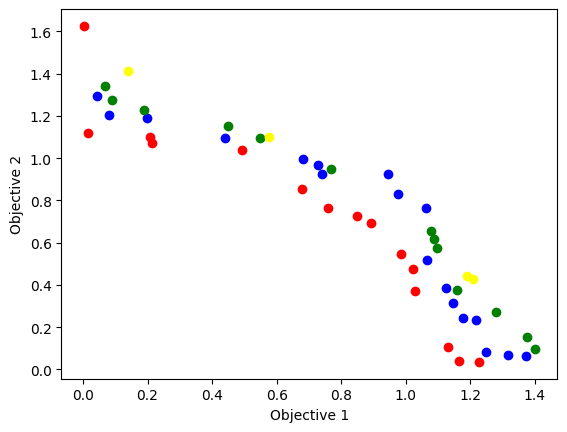

In [50]:
import matplotlib.pyplot as plt
# plotting only included fronts in Archive
front_1_x = [i[0] for i in ranks[0]]
front_1_y = [i[1] for i in ranks[0]]
front_2_x = [i[0] for i in ranks[1]]
front_2_y = [i[1] for i in ranks[1]]
front_3_x = [i[0] for i in ranks[2]]
front_3_y = [i[1] for i in ranks[2]]
front_4_x = [i[0] for i in final_included_data]
front_4_y = [i[1] for i in final_included_data]
plt.scatter(front_1_x,front_1_y,color='red')
plt.scatter(front_2_x,front_2_y,color='blue')
plt.scatter(front_3_x,front_3_y,color='green')
plt.scatter(front_4_x,front_4_y,color='yellow')
plt.ylabel('Objective 2')
plt.xlabel('Objective 1')